In [157]:
import pandas as pd
import sys, os
import geopandas as gpd
# from pandas import Timestamp
# from shapely.geometry import Point

from GOSTRocks.misc import tPrint

sys.path.append("../src")
from len_tools import Catalog

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
%%time
cat = Catalog()

CPU times: user 30.2 s, sys: 1.13 s, total: 31.3 s
Wall time: 31.3 s


In [47]:
cat_time_filter = cat.search_by_year_month(2020, 5)
# res = cat.search_by_day("2020-05-04")

In [48]:
print(cat_time_filter)

Catalog with 3666 scenes


In [49]:
adm0 = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [50]:
adm0 = adm0.loc[adm0.iso_a3 == "NIC"]

<AxesSubplot:>

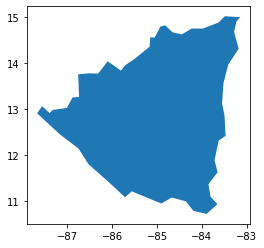

In [51]:
adm0.plot()

In [52]:
point = adm0.centroid.iloc[0]

<ipython-input-52-ff43df312a0e>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  point = adm0.centroid.iloc[0]


In [53]:
%%time
# cat_aoi_filter = cat_time_filter.search_by_intersect(point)
cat_aoi_filter = cat_time_filter.search_by_intersect(adm0)

CPU times: user 31.2 ms, sys: 1.04 ms, total: 32.2 ms
Wall time: 31.4 ms


In [54]:
print(cat_aoi_filter)

Catalog with 70 scenes


In [151]:
# Read in quality values from metadata
with open(os.path.join("../src/catalog", "new_good_vflag_ints.txt")) as inData:
    good_flags = [int(line) for line in inData]
    
good_flags

[160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 32928,
 32929,
 32930,
 32931,
 32932,
 32933,
 32934,
 32935,
 49312,
 49313,
 49314,
 49315,
 49316,
 49317,
 49318,
 49319,
 65696,
 65697,
 65698,
 65699,
 65700,
 65701,
 65702,
 65703,
 98464,
 98465,
 98466,
 98467,
 98468,
 98469,
 98470,
 98471,
 114848,
 114849,
 114850,
 114851,
 114852,
 114853,
 114854,
 114855,
 131232,
 131233,
 131234,
 131235,
 131236,
 131237,
 131238,
 131239,
 164000,
 164001,
 164002,
 164003,
 164004,
 164005,
 164006,
 164007,
 180384,
 180385,
 180386,
 180387,
 180388,
 180389,
 180390,
 180391,
 196768,
 196769,
 196770,
 196771,
 196772,
 196773,
 196774,
 196775,
 229536,
 229537,
 229538,
 229539,
 229540,
 229541,
 229542,
 229543,
 245920,
 245921,
 245922,
 245923,
 245924,
 245925,
 245926,
 245927,
 262304,
 262305,
 262306,
 262307,
 262308,
 262309,
 262310,
 262311,
 295072,
 295073,
 295074,
 295075,
 295076,
 295077,
 295078,
 295079,
 311456,
 311457,
 311458,
 311459,
 311460,
 31

In [153]:
cat_aoi_filter.scenes

,idx,col_id,filename,item_id,href,bbox,geometry,date,datetime,ym,minx,miny,maxx,maxy
365984,29,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co.json,SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0624008_e0629412_b44093_c20200501102942807493_noac_ops.rade9.co.tif,"[-90.002083335, 1.002063334999999, -56.002056135, 26.002083335]","POLYGON ((-90.00208 1.00206, -90.00208 26.00208, -56.00206 26.00208, -56.00206 1.00206, -90.00208 1.00206))",2020-05-01,2020-05-01 06:24:00+00:00,2020-05,-90.002083,1.002063,-56.002056,26.002083
365993,38,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co.json,SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200501_t0806264_e0812068_b44094_c20200501121207969852_noac_ops.rade9.co.tif,"[-116.002083335, -1.997936665000001, -82.002056135, 23.002083335]","POLYGON ((-116.00208 -1.99794, -116.00208 23.00208, -82.00206 23.00208, -82.00206 -1.99794, -116.00208 -1.99794))",2020-05-01,2020-05-01 08:06:26+00:00,2020-05,-116.002083,-1.997937,-82.002056,23.002083
366104,149,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0606305_e0612109_b44107_c20200502101212281822_noac_ops.rade9.co.tif,"[-86.002083335, -3.997936665000001, -53.002056935, 21.002083335]","POLYGON ((-86.00208 -3.99794, -86.00208 21.00208, -53.00206 21.00208, -53.00206 -3.99794, -86.00208 -3.99794))",2020-05-02,2020-05-02 06:06:30+00:00,2020-05,-86.002083,-3.997937,-53.002057,21.002083
366112,157,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0743145_e0748549_b44108_c20200502114856562241_noac_ops.rade9.co.tif,"[-108.002083335, 12.002063335000003, -72.00205453499998, 37.002083335]","POLYGON ((-108.00208 12.00206, -108.00208 37.00208, -72.00205 37.00208, -72.00205 12.00206, -108.00208 12.00206))",2020-05-02,2020-05-02 07:43:14+00:00,2020-05,-108.002083,12.002063,-72.002055,37.002083
366113,158,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co.json,SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200502_t0748561_e0754365_b44108_c20200502115437436693_noac_ops.rade9.co.tif,"[-112.002083335, -6.997936665000001, -79.002056935, 18.002083335]","POLYGON ((-112.00208 -6.99794, -112.00208 18.00208, -79.00206 18.00208, -79.00206 -6.99794, -112.00208 -6.99794))",2020-05-02,2020-05-02 07:48:56+00:00,2020-05,-112.002083,-6.997937,-79.002057,18.002083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369309,3354,VIIRS_DNB_rade9_npp_202005,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200529_t0737204_e0743008_b44491_c20200529114301068806_nobc_ops.rade9.co.json,SVDNB_npp_d20200529_t0737204_e0743008_b44491_c20200529114301068806_nobc_ops.rade9.co,https://globalnightlight.s3.amazonaws.com/npp_202005/SVDNB_npp_d20200529_t0737204_e0743008_b44491_c20200529114301068806_nobc_ops.rade9.co.tif,"[-107.002083335, 11.002064135000001, -71.00205453499998, 

In [182]:
aws_bucket = 'globalnightlight'
def viirs_night(aws_bucket, rade_file):
    month = rade_file.split("/")[-2]
    file_name = rade_file.split("/")[-1]
    day     = file_name.split("_")[2]
    time    = file_name.split("_")[3]
    e_thing = file_name.split("_")[4]
    # search through bucket to find other files matching that day
    s3 = boto3.client('s3', config=Config(signature_version=UNSIGNED))
    sel_files = []
    truncated = True
    continuation = ''
    sel_month = s3.list_objects_v2(Bucket='globalnightlight', Prefix=month)        
    n_loops = 0
    while truncated:
        #print(n_loops)
        #return(sel_month)
        truncated = sel_month['IsTruncated']        
        for item in sel_month['Contents']:
            if (day in item['Key']) & (time in item['Key']):# & (e_thing in item['Key']):
                sel_files.append(item['Key'])
        if truncated:
            sel_month = s3.list_objects_v2(Bucket='globalnightlight', Prefix=month, ContinuationToken=sel_month['NextContinuationToken'])        
        n_loops = n_loops+1
    return(sel_files)

def clean_viirs_data(aws_bucket, scenes, geometry, good_flags):
    n_loops = 0
    for idx, row in scenes.iterrows():
        tPrint(f'{row.col_id}: {n_loops} of {scenes.shape[0]}')
        n_loops = n_loops + 1
        # Get the input files
        xx = viirs_night(aws_bucket, row['filename'])
        http_base = os.path.dirname(os.path.dirname(row.href))

        inRad = rasterio.open(os.path.join(http_base, xx[3]))
        inFlag = rasterio.open(os.path.join(http_base, xx[-1]))
        
        ul = inRad.index(*geometry.bounds[0:2])
        lr = inRad.index(*geometry.bounds[2:4])
        window = ((float(lr[0]), float(ul[0]+1)), (float(ul[1]), float(lr[1]+1)))
        
        inRad_data = inRad.read(1, window=window)
        inFlag_data = inFlag.read(1, window=window)
        
        good_data = np.isin(inFlag_data, good_flags).astype(int)
        good_rad = inRad_data * good_data
        try:
            if n_loops > 1:            
                final_data  = final_data + good_rad
                final_count = final_count + good_data
            else:
                final_data = good_rad
                final_count = good_data
        except:
            print(f'Error processing {idx}')
    return({'data':final_data, 'count':final_count})

res = clean_viirs_data(aws_bucket, cat_aoi_filter.scenes, adm0.unary_union, good_flags)

12:28:46	VIIRS_DNB_rade9_npp_202005: 0 of 70
12:28:51	VIIRS_DNB_rade9_npp_202005: 1 of 70
12:28:55	VIIRS_DNB_rade9_npp_202005: 2 of 70
Error processing 366104
12:28:59	VIIRS_DNB_rade9_npp_202005: 3 of 70
Error processing 366112
12:29:03	VIIRS_DNB_rade9_npp_202005: 4 of 70
12:29:07	VIIRS_DNB_rade9_npp_202005: 5 of 70
12:29:11	VIIRS_DNB_rade9_npp_202005: 6 of 70
Error processing 366231
12:29:16	VIIRS_DNB_rade9_npp_202005: 7 of 70
12:29:20	VIIRS_DNB_rade9_npp_202005: 8 of 70
12:29:25	VIIRS_DNB_rade9_npp_202005: 9 of 70
Error processing 366477
12:29:29	VIIRS_DNB_rade9_npp_202005: 10 of 70
Error processing 366587
12:29:34	VIIRS_DNB_rade9_npp_202005: 11 of 70
12:29:38	VIIRS_DNB_rade9_npp_202005: 12 of 70
12:29:43	VIIRS_DNB_rade9_npp_202005: 13 of 70
Error processing 366596
12:29:47	VIIRS_DNB_rade9_npp_202005: 14 of 70
Error processing 366704
12:29:52	VIIRS_DNB_rade9_npp_202005: 15 of 70
Error processing 366705
12:29:56	VIIRS_DNB_rade9_npp_202005: 16 of 70
12:30:01	VIIRS_DNB_rade9_npp_202005:

In [206]:
from rasterio.mask import mask
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

#write the output
tempR = res['count']
out_folder = "/home/wb411133/temp"

inRad = rasterio.open(os.path.join(http_base, xx[3]))
        
out_img, out_transform = mask(inRad, getFeatures(adm0), crop=True)


profile = rasterio.profiles.DefaultGTiffProfile()

NameError: name 'CRS' is not defined

In [213]:
c_profile = inRad.profile.copy()
c_profile.update(transform=out_transform, width=out_img.shape[1], height=out_img.shape[2])

with rasterio.open(os.path.join(out_folder, 'NIC_rad.tif'), 'w', **c_profile) as outR:
    outR.write_band(1, res['data']/res['count'])
    
with rasterio.open(os.path.join(out_folder, 'NIC_count.tif'), 'w', **c_profile) as outR:
    outR.write_band(1, res['count'])

<ipython-input-213-6979430b97b8>:5: RuntimeWarning: invalid value encountered in true_divide
  outR.write_band(1, res['data']/res['count'])


In [211]:
out_folder

'/home/wb411133/temp'

# Clean imagery

In [204]:
mask?

In [190]:
inRad.profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 8160, 'height': 6000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00416667, 0.0, -90.002083335,
       0.0, -0.00416667, 26.002083335), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

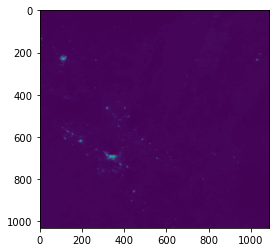

<AxesSubplot:>

In [184]:
show(res['data'])

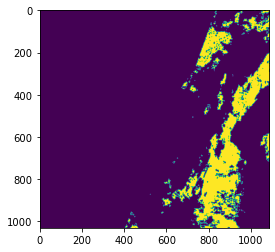

<AxesSubplot:>

In [147]:
good_data = np.isin(inFlag_data, good_flags)
show(good_data)

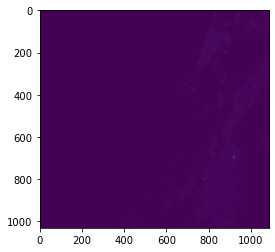

<AxesSubplot:>

In [150]:
good_data = np.isin(inFlag_data, good_flags)
good_rad = inRad_data * good_data
show(good_rad)

# Debugging